In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv


**Recommendation System**

Recommendation System is a system that seeks to predict or filter preferences according to the user’s choices. Recommendation systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general. Netflix, Amazon, and other companies use recommendation systems to help their users find the right product or movie for them.

**Content-based Filtering***: 
These suggest recommendations based on the item metadata (movie, product, song, etc). Here, the main idea is if a user likes an item, then the user will also like items similar to it.

**Collaboration-based Filtering**: 
These systems make recommendations by grouping the users with similar interests. For this system, metadata of the item is not required.**

**EXPLORATORY DATA ANALYSIS**

In [2]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import plotly.graph_objects as go
import ast
from collections import Counter
import nltk
import wordcloud
from wordcloud import WordCloud

In [3]:
# importing datasets
movies = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')

credits = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv')

In [4]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [5]:
credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [6]:
print("shape of movies dataset:", movies.shape)
print("shape of credits dataset:", movies.shape)

shape of movies dataset: (4803, 20)
shape of credits dataset: (4803, 20)


In [7]:
#joining two datasets
movies = pd.merge(left = movies, right = credits, on='title')

In [8]:
# making a copy of movies datasets, using mocies1 for eda for recommender system
movies1 = movies.copy()

In [9]:
#dropping unncessary columns
movies1 = movies1.drop(columns = ['homepage','tagline','id','overview','status','original_title','movie_id'])

In [10]:
# duartion of the data
movies1['release_date'] = pd.to_datetime(movies1['release_date'])
print(movies1['release_date'].max()-movies1['release_date'].min())

36677 days 00:00:00


In [11]:
movies1.head(3)

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [12]:
# tidying up genre, productiom_companies adn production countries column
def func(obj):
    List = []
    for i in ast.literal_eval(obj):
        List.append(i['name'])
    return List    

In [13]:
movies1['production_companies'] = movies1['production_companies'].apply(func)
movies1['production_countries'] = movies1['production_countries'].apply(func)



In [14]:
movies1.head(3)

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


**time to visualize our data**

In [15]:
genres = Counter()
for i in range(movies1.shape[0]):
    for j in movies1.genres[i]:
        genres[j]+=1
Genres = pd.DataFrame.from_dict(genres, orient='index').reset_index()
Genres = Genres.rename(columns = {'index': 'Genres' ,0: 'Frequency'})

Genres.loc[Genres['Frequency'] < 200, 'Genres'] = 'Others'
fig = px.pie(Genres, values='Frequency', names='Genres',width=800,height=500)
fig.update_layout(
    title="Distribution of Genres",
    legend_title="Genre",
    font=dict(
        size=14
    )
)
fig.layout.template = 'plotly'
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

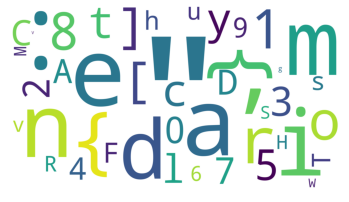

In [16]:
# word cloud for genre
wc = WordCloud(background_color = 'white', min_font_size = 10, width = 1600, height=900, margin=5)
wc = wc.fit_words(genres)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [17]:
# top production companies
prod = Counter()
for i in range(movies1.shape[0]):
    for j in movies1.production_companies[i]:
        prod[j]+=1
movie_prod = pd.DataFrame.from_dict(prod, orient='index').reset_index()
movie_prod = movie_prod.rename(columns = {'index': 'Production Company' ,0: 'Frequency'})
movie_prod=movie_prod.sort_values(by = ['Frequency'],ascending=False).reset_index().head(15)
movie_prod.drop(columns='index',axis=0,inplace=True)
movie_prod.style.background_gradient(cmap='RdBu_r')

,Production Company,Frequency
0,Warner Bros.,320
1,Universal Pictures,311
2,Paramount Pictures,285
3,Twentieth Century Fox Film Corporation,223
4,Columbia Pictures,201
5,New Line Cinema,165
6,Metro-Goldwyn-Mayer (MGM),122
7,Touchstone Pictures,118
8,Walt Disney Pictures,114
9,Relativity Media,102


In [18]:
fig = px.bar( movie_prod, x='Production Company',y='Frequency', color ='Production Company',width=1000, height=650) 
fig.update_layout(
    title="Top 15 Production Companies",
    xaxis_title="Production Companies",
    yaxis_title="Frequency",
    legend_title="Production Companies",
    font=dict(
        size=14
    )
)
fig.layout.template = 'plotly'
fig.show()


In [19]:
popular= movies1[['title', 'popularity']]
popular=popular.sort_values(by='popularity', ascending=False).reset_index().head(15)
popular.drop(columns='index', axis=0, inplace=True)

fig = px.scatter(popular, x='title',y='popularity', color ='popularity',size='popularity',width=950, height=650) 
fig.update_layout(
    title="Top 15 popular movies of all time",
    xaxis_title="Movies",
    yaxis_title="Popularity",
    legend_title="Popularity",
    font=dict(
        size=14
    )
)
fig.layout.template = 'plotly'
fig.show()


In [20]:
lang = movies1.groupby('original_language')[['title']].count()

lang.loc[lang['title'] < 20, 'title'] = 'Others'

fig = px.pie(lang, values='title', names=lang.index, width=800, height=500)
fig.update_layout(
    title="Distribution of Language",
    legend_title="Language",
    font=dict(
        size=14
    )
)
fig.layout.template='plotly'
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [21]:
fig = px.scatter(movies1, y='budget',x='revenue',width=950, height=500) 
fig.update_layout(
    title="No. of movies produced over the years",
    xaxis_title="Revenue",
    yaxis_title="Budget",
    font=dict(
        size=14
    )
)
fig.layout.template = 'plotly'
fig.show()

**movies recommendation system**

In [22]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [23]:
# selecting only useful columns
movies2= movies[['id', 'title', 'overview', 'genres', 'cast', 'keywords', 'crew']]
movies.head()



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [24]:
movies2.isnull().sum()

id          0
title       0
overview    3
genres      0
cast        0
keywords    0
crew        0
dtype: int64

In [25]:
# dropping null values
movies2.dropna(inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The movie data is present in the form of lists containing strings, we need to convert the data into a safe and usable structure. Let’s apply the literal_eval() function to the features.

In [26]:
def func(obj):
    List = []
    for i in ast.literal_eval(obj):
        List.append(i['name'])
    return List    

In [27]:
movies2.head()

,id,title,overview,genres,cast,keywords,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [28]:
def func1(obj):
    List = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter !=3:
            List.append(i['name'])
            counter+=1
        else:
            break
    return List

In [29]:
movies2['cast'] = movies2['cast'].apply(func1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
def func2(obj):
    List = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            List.append(i['name'])
            break
    return List

In [31]:
movies2['crew'] = movies2['crew'].apply(func2)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
# splitting the text in the overview column
movies2['overview'] = movies2['overview'].apply(lambda x:x.split()) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
movies2.head()


,id,title,overview,genres,cast,keywords,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[Christian Bale, Michael Caine, Gary Oldman]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",[Andrew Stanton]


In [34]:
# applying a transformation to remove spaces between words
movies2['genres'] = movies2['genres'].apply(lambda x:[i.replace(" ", "") for i in x])
movies2['keywords'] = movies2['keywords'].apply(lambda x:[i.replace(" ", "") for i in x])
movies2['cast'] = movies2['cast'].apply(lambda x:[i.replace(" ", "") for i in x])
movies2['crew'] = movies2['crew'].apply(lambda x:[i.replace(" ", "") for i in x])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [35]:
# making tag column by combining other 5 columns
movies2['tags'] = movies2['overview'] + movies2['genres'] + movies2['keywords'] + movies2['cast'] + movies2['crew']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
movies4 = movies2[['id', 'title', 'tags']] 

In [37]:
movies4.head()

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [38]:
pd.options.mode.chained_assignment = None
movies4['tags'] = movies4['tags'].apply(lambda x:" ".join(x))

In [39]:
#lower casing all the alphabets in the tags column
movies4['tags'] = movies4['tags'].apply(lambda x:x.lower())


In [40]:
# text vectoriation
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words='english')


In [41]:
vectors = cv.fit_transform(movies4['tags']).toarray()

In [42]:
# stemming process
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [43]:
# defining stemming function
def stem(text):
    a=[]
    for i in text.split():
        a.append(ps.stem(i))
    return " ".join(a)    

In [44]:
movies4['tags'] = movies4['tags'].apply(stem)

In [45]:
# measuring similarity between movies using cosine distance
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(vectors) 

In [46]:
def recommend_me(movie):
    movie_index = movies4[movies4['title'] == movie].index[0]
    distances =similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:6]
    
    for i in movies_list:
        print(movies4.iloc[i[0]].title)

In [47]:
recommend_me('Batman')

Batman
The Dark Knight Rises
Batman & Robin
Batman
Batman Begins


In [48]:
recommend_me('Thor') 


Thor: The Dark World
Jason X
Ponyo
2012
After Earth
